In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"doesn't", 'so', 'won', 'mustn', "mustn't", 'had', 'themselves', 'than', 'of', 'some', 'mightn', 'been', "shan't", 'here', 'am', 'isn', "you'd", 'too', 'o', 'wasn', 'after', 'an', 'doing', 'once', 'whom', 'each', 'under', 'aren', 'both', 'few', 'same', 'did', 'when', 'have', 'doesn', "wasn't", 'on', 'can', 'has', 'only', 'very', "it's", 'below', 'more', 'are', 'to', 'now', "hadn't", 'yourselves', 'couldn', 'shouldn', "you'll", 'ma', 'his', 'off', 'why', "hasn't", 'herself', "couldn't", 'having', 'yours', "needn't", 'the', 'before', 'shan', 'me', 'was', 'd', 'and', 'theirs', "haven't", 'at', 'ain', 'down', 'with', "wouldn't", 'myself', 'if', 've', 'who', 'by', 'during', 'all', "you've", 'is', 'because', 'don', 'how', 'she', 'weren', 'your', 'any', 'from', 'until', 'hasn', 'you', 'up', 'didn', 'should', 'other', 'above', 'does', 'ourselves', 'such', "didn't", 'which', 'that', "weren't", 'needn', 'hadn', "isn't", 'm', 'their', "won't", "shouldn't", 'over', 'we', 'haven', "that'll", 's', 

In [ ]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
 Classroom  'Colab Notebooks'   Videos	 Папка	 проекти
 abalone.csv
 agaricus-lepiota.csv
 base_config.cfg
 categories.json
'Copy of featuretools.ipynb'
'Copy of Trees.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 crx.data
 data.csv
 glass.csv
 Homework_1.ipynb
 Homework4.ipynb
 Homework5.ipynb
 HW10.ipynb
 HW11.ipynb
 HW12.ipynb
 HW13.ipynb
 hw5_vasiliev.ipynb
 HW6.ipynb
 HW7_1.ipynb
 HW7.ipynb
 HW9.ipynb
'hw_pandas (1).ipynb'
 hw_pandas.ipynb
'IMDB Dataset.csv'
'IMDB Dataset.gsheet'
'player_data (1).csv'
 player_data.csv
'Players (1).csv'
 Players.csv
 projects
 project.yml
'Seasons_Stats (1).csv'
 Seasons_Stats.csv
'Sentiment analysis on IMDB dataset _ ML Live.ipynb'
 T10Y2Y.csv
 tagger_parser_ud
'topic2_practice_visual_titanic_solution (1).ipynb'
 topic2_practice_visual_titanic_solution.ipynb
 train.spacy
 TreeHomework.ipynb
 Untitled
 Untitled0.ipynb
 Untitled2.ipynb
 valid.spacy
 winequality-red.csv
 winequality-white.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IMDB Dataset.csv', sep=",")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


просчитаем количество слов в каждом отклике

In [ ]:
def word_count(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [ ]:
df['count'] = df['review'].apply(word_count)

In [ ]:
df.head()

,review,sentiment,count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Поскольку отклики это классификационная фича то меняем на числовой вид

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["sentiment"] = labelencoder.fit_transform(df["sentiment"])

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


убираем все входжения например html тегов ,  токенизацируем слова из каждого отзыва убираем все стоп слова котрые нам не нужны

In [ ]:
def get_clear_data(t):
    t= t.lower()
    t = re.sub('<br />', '', t)
    t = re.sub(r"https\S+|www\S+|http\S+", '', t, flags = re.MULTILINE)
    t = re.sub(r'\@w+|\#', '', t)
    t = re.sub(r'[^\w\s]', '', t)
    t_tokens = word_tokenize(t)
    filtered_text = [w for w in t_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
df.review = df['review'].apply(get_clear_data)

Находим дубликаты и удаляем их

In [ ]:
dupl = df.duplicated().sum()
print (dupl)

422


In [ ]:
df = df.drop_duplicates('review')
dupl = df.duplicated().sum()
print (dupl)

0


In [ ]:
df['word count'] = df['review'].apply(word_count)
df.head()

,review,sentiment,count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically theres family little boy jake thinks...,0,138,67
4,petter matteis love time money visually stunni...,1,230,125


Stemming

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [ ]:
df['word count'] = df['review'].apply(word_count)
df.head()

,review,sentiment,count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically theres family little boy jake thinks...,0,138,67
4,petter matteis love time money visually stunni...,1,230,125


берем позитивные отклики

In [ ]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
4,petter matteis love time money visually stunni...,1,230,125
5,probably alltime favorite movie story selfless...,1,119,58


строим график, для визуального отображения

In [ ]:
def graph_for_analis_text(t, type):
    text = ' '.join([word for word in t])
    plt.figure(figsize=(20,15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(type, fontsize = 19)
    plt.show()

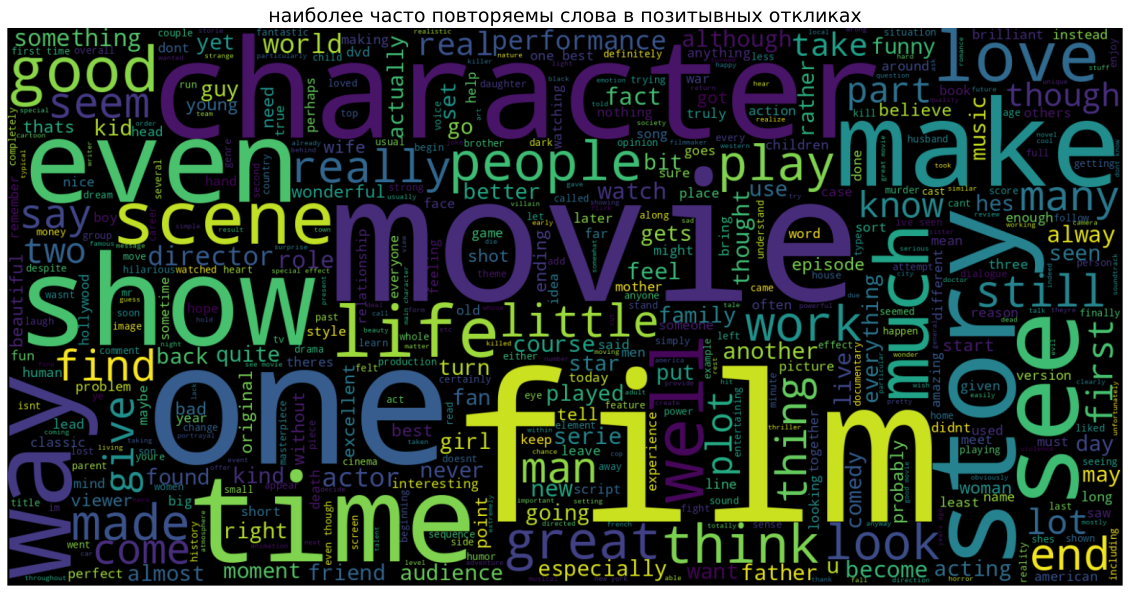

In [ ]:
graph_for_analis_text(pos_reviews['review'], "наиболее часто повторяемы слова в позитывных откликах")

по облаку слов можно увидеть наиболее часто повторяемы слова например film, movie и тд
Посмотрим теперь в числовом варианте

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [ ]:
px.bar(pos_words, x='count', y='word', title='Общие слова в позитивных комментариях', color = 'word')

по графикам и числовым данным видим, что есть члова которые могут классифицировать что комментарии позитивные good, great, well and so on

Теперь проанализируем негативные комментарии таким же образом


In [ ]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,count,word count
3,basically theres family little boy jake thinks...,0,138,67
7,show amazing fresh innovative idea 70s first a...,0,174,83
8,encouraged positive comments film looking forw...,0,130,64
10,phil alien one quirky films humour based aroun...,0,96,51
11,saw movie 12 came recall scariest scene big bi...,0,180,84


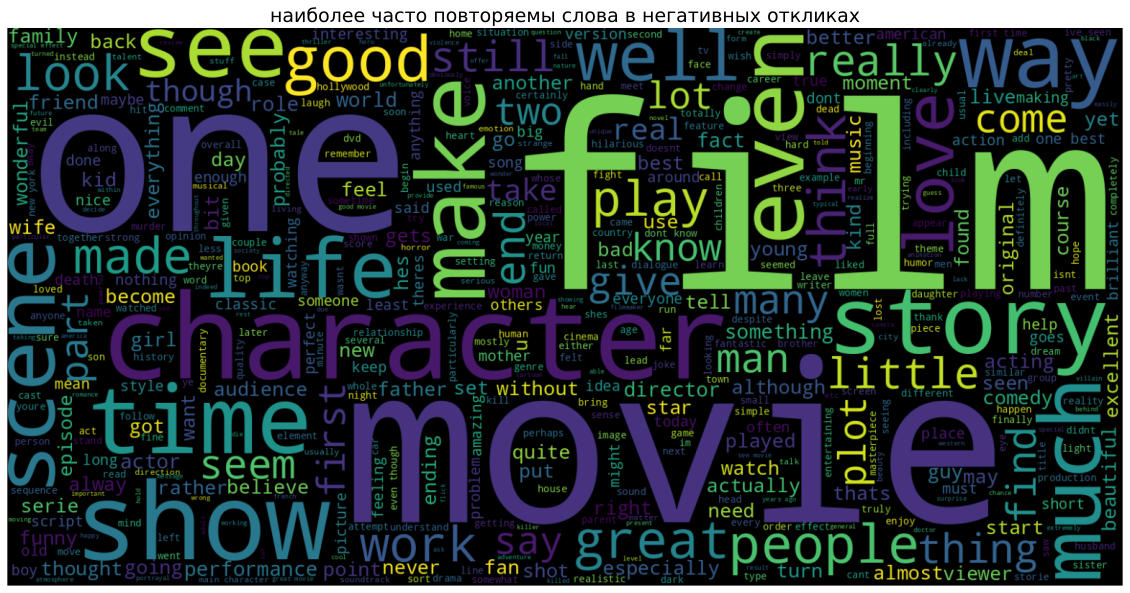

In [ ]:
graph_for_analis_text(pos_reviews['review'], "наиболее часто повторяемы слова в негативных откликах")

In [ ]:
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [ ]:
px.bar(neg_words, x='count', y='word', title='Общие слова в негативных комментариях', color = 'word')

In [ ]:
X = df['review']
Y = df['sentiment']

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


Попробуем разные модели такие как регрессия, LinearSVC и с помощью GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc*100)

89.0009412397472


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6453  908]
 [ 728 6785]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc*100)

89.21608175339519


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   1.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.5s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.5s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.5s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   1.0s
[CV 2/5] END ...................C=1, loss=hinge;,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END .................C=100, loss=hinge;, score=0.874 total time=  18.2s
[CV 4/5] END .................C=100, loss=hinge;, score=0.880 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END .................C=100, loss=hinge;, score=0.878 total time=  16.9s
[CV 1/5] END .........C=100, loss=squared_hinge;, score=0.877 total time=   4.7s
[CV 2/5] END .........C=100, loss=squared_hinge;, score=0.882 total time=  11.3s
[CV 3/5] END .........C=100, loss=squared_hinge;, score=0.875 total time=  14.0s
[CV 4/5] END .........C=100, loss=squared_hinge;, score=0.881 total time=  10.8s
[CV 5/5] END .........C=100, loss=squared_hinge;, score=0.878 total time=  10.5s


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [ ]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc*100)

89.41105284388865


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



Все модели отработали хорошо с скором 89%

##spaCy

In [ ]:
import spacy

Теперь сделаем все тоже самое, только подготовим данные с помощью библиотеки spaCy

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IMDB Dataset.csv', sep=",")



Поскольку отклики это классификационная фича то меняем на числовой вид

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["sentiment"] = labelencoder.fit_transform(df["sentiment"])

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df.review = df['review'].apply(get_clear_data)

In [ ]:
dupl = df.duplicated().sum()
print (dupl)

422


In [ ]:
df = df.drop_duplicates('review')
dupl = df.duplicated().sum()
print (dupl)

0


In [ ]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom  'Colab Notebooks'   Videos	 Папка	 проекти
 abalone.csv
 agaricus-lepiota.csv
'Copy of featuretools.ipynb'
'Copy of Trees.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 crx.data
 data.csv
 glass.csv
 Homework_1.ipynb
 Homework4.ipynb
 Homework5.ipynb
 HW10.ipynb
 HW11.ipynb
 HW12.ipynb
 HW13.ipynb
 hw5_vasiliev.ipynb
 HW6.ipynb
 HW7_1.ipynb
 HW7.ipynb
 HW9.ipynb
'hw_pandas (1).ipynb'
 hw_pandas.ipynb
'IMDB Dataset.csv'
'player_data (1).csv'
 player_data.csv
'Players (1).csv'
 Players.csv
 projects
'Seasons_Stats (1).csv'
 Seasons_Stats.csv
'Sentiment analysis on IMDB dataset _ ML Live.ipynb'
 T10Y2Y.csv
 tagger_parser_ud
'topic2_practice_visual_titanic_solution (1).ipynb'
 topic2_practice_visual_titanic_solution.ipynb
 TreeHomework.ipynb
 Untitled
 Untitled0.ipynb
 Untitled2.ipynb
 winequality-red.csv
 winequality-white.csv


In [ ]:
from spacy.tokens import DocBin
import pathlib
import csv, json


dataset = list(df[["review", "sentiment"]].sample(frac=1).itertuples(index=False, name=None))
train_data = dataset[:15000]
dev_data = dataset[15000:18000]
test_data = dataset[18000:]
print(f"Total: {len(dataset)} - Train:  {len(train_data)} - Dev: {len(dev_data)} - Test: {len(test_data)}")


Total: 49578 - Train:  15000 - Dev: 3000 - Test: 31578


In [ ]:

nlp = spacy.blank("en")
def convert(data, outfile):
    db = spacy.tokens.DocBin()
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):
        doc.cats["POS"] = label == 1
        doc.cats["NEG"] = label == 0
        db.add(doc)

    db.to_disk(outfile)
convert(train_data, "./train.spacy")
convert(dev_data, "./dev.spacy")
convert(test_data, "./test.spacy")

In [ ]:



!python -m spacy init config  --lang pt --pipeline textcat --optimize efficiency --force config.cfg

2023-08-03 21:00:18.244182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: pt
- Pipeline: textcat
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:

!python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy --output model --verbose

2023-08-03 21:00:40.533609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2023-08-03 21:00:44,089] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-08-03 21:00:44,263] [INFO] Set up nlp object from config
[2023-08-03 21:00:44,285] [DEBUG] Loading corpus from path: dev.spacy
[2023-08-03 21:00:44,288] [DEBUG] Loading corpus from path: train.spacy
[2023-08-03 21:00:44,288] [INFO] Pipeline: ['textcat']
[2023-08-03 21:00:44,294] [INFO] Created vocabulary
[2023-08-03 21:00:44,295] [INFO] Finished initializing nlp object
[2023-08-03 21:01:20,827] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2023-08-03 21:01:20,862] [DEBUG] Loading corpus from path: dev.spacy
[2023-08-03 21:01:20,865] [DEBU

In [ ]:
!python -m spacy evaluate ./model/model-best/ ./test.spacy

2023-08-03 21:07:04.934846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Using CPU

================================== Results ==================================

TOK                 97.93 
TEXTCAT (macro F)   87.97 
SPEED               274081


=========================== Textcat F (per label) ===========================

          P       R       F
POS   88.55   87.28   87.91
NEG   87.41   88.67   88.03


======================== Textcat ROC AUC (per label) ========================

      ROC AUC
POS      0.95
NEG      0.95

